<a href="https://colab.research.google.com/github/carloslizarragac/FisicaComputacional1/blob/master/Actividad11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Solución Numérica de la Ecuación de Onda

La ecuación de onda es una ecuación diferencial parcial de segundo orden en el tiempo y las coordenadas espaciales y tiene la forma

\begin{equation*}
\frac{\partial^2 u}{\partial t^2} = c^2 \left( 
  \frac{\partial^2 u}{\partial x^2} +
  \frac{\partial^2 u}{\partial y^2} +
  \frac{\partial^2 u}{\partial z^2} \right)
\end{equation*}

donde $c^2$ es la velocidad de propagación de la información. La función $u(x,y,z,t)$ representa la presión en una onda acústica, la intensidad de un campo electromagnético, el desplazamiento respecto a un nivel de referencia como lo puede ser la amplitud de una onda superficial en la superficie del agua o el desplazamiento respecto a la horizontal de una cuerda vibrante. 

En una dimensión, por ejemplo el caso de una cuerda vibrante, la Ecuación de Onda se simplifica a 

\begin{equation*}
\frac{\partial^2 u}{\partial t^2} = c^2 \left( 
  \frac{\partial^2 u}{\partial x^2}
   \right) + f(x,t) \qquad x \in (0,L], t \in (0,T]
\end{equation*}

Requerimos definir 4 condiciones: 2 iniciales (derivada de segundo orden en t) y 2 a la frontera (segundo orden en el espacio), para encontrar la solución.

\begin{eqnarray*}
u(x,0) & = & I(x) \\
\frac{\partial}{\partial t} u(x,0) & = & 0 \\
u(0,t) & = & 0 \\
u(L,t) & = & 0 \\
\end{eqnarray*}

Se requiere también especificar el valor de la constante $c$ y la función $I(x)$.


**Solución de la Ecuación de Onda en una dimensión por el Método de Diferencias Finitas.**

Podemos comenzar aproximando las segundas derivadas por diferencias finitas centradas de segundo orden.

Si $h$ es el incremento en la dirección $x=\Delta x$ y $k=\Delta t$ es el incremento en el tiempo. Entonces en un punto de la malla discreta $(x,t)$ tendremos

\begin{equation*}
\frac{u(x,t+k) -2u(x,t) + u(x,t-k)}{k^2} = c^2
\frac{u(x+h,t) -2u(x,t) + u(x-h,t)}{h^2}
\end{equation*}

La ecuación anterior define un esténcil computacional de 5 puntos y se respresenta como

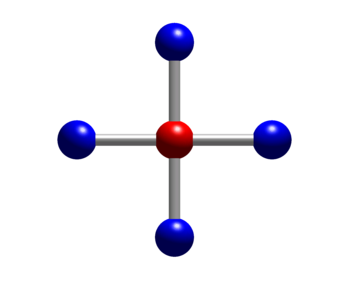

El cual nos permite calcular los valores de $u(x,t)$ en el espacio discretizado:
$x_0=0,x_1,x_2,\ldots, x_M=L$, $t_0=0, t_1, t_2, \ldots, t_N=T$, espaciados uniformamente por $h = \Delta x$ y $k=\Delta t$.  

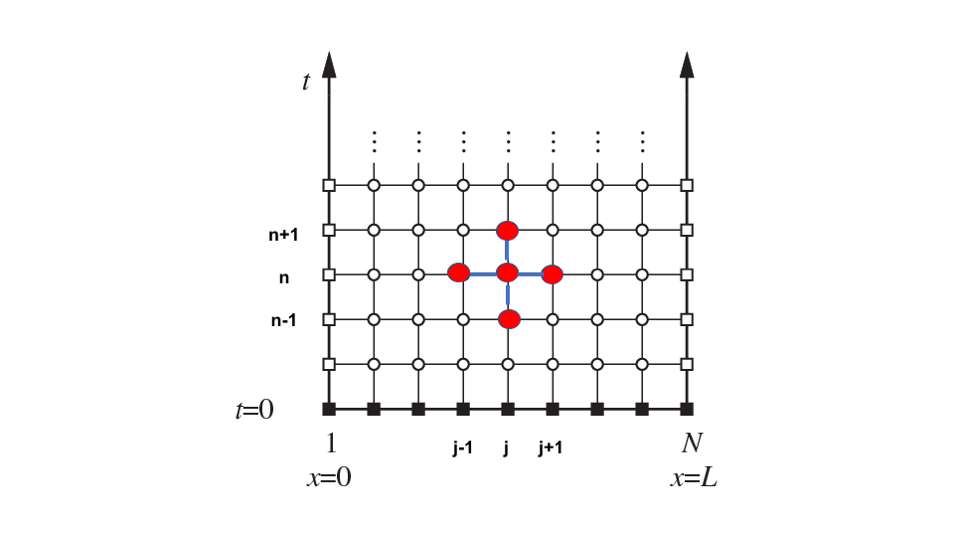


Para inicial el algoritmo tendremos que calcular el primer nivel de $u(x,k)$ en $t=k$, usando sólo la información de la condición inicial, con otro esténcil de 4 puntos similar al que utilizamos en la Ecuación de Calor.

Una vez hecho esto, ya podremos calcular todos los valores futuros de $u(x,t+k)$ ya que se conocen los valores de $u(x,t)$ y $u(x,t-k)$.

**Ecuación de Onda en diferencias finitas**

Si definimos $u(x,t) = u(jh, nk) = u_j^n$, la ecuación de onde la podemos expresar 

\begin{equation*}
\frac{u_j^{n+1} - 2 u_j^n + u_j^{n-1}}{k^2} = c^2
\frac{u_{j+1}^n - 2 u_j^n + u_{j-1}^n}{h^2}
\end{equation*}

y despejamos para el valor desconocido $u_j^{n+1}$

\begin{equation*}
u_j^{n+1} = 2 u_j^n - u_j^{n-1} + C^2 (u_{j+1}^n - 2 u_j^n + u_{j-1}^n)
\end{equation*}

donde hemos introducido la constante $C^2 = c^2 k^2/h^2$, conocida como la constante de Courant.

**Iniciando el algoritmo**

Como no se puede aplicar el esténcil de 5 puntos pata calcular el primer nivel usaremos un esténcil similar de 4 puntos con la información de la condición inicial para calcular $u(x,t=k)$.

Remplazamos la condición inicial por diferencias finitas centradas de segundo orden

\begin{equation*}
\frac{\partial}{\partial t} u_j^0 = 
\frac{u_j^1 - u_j^{-1}}{2k}  = 0 
\end{equation*}

lo que indica que $u_j^1 = u_j^{-1}$.

Sustituimos la igualdad anterior en la ecuación de onda y nos queda que

\begin{equation*}
u_j^1 = u_j^0 + \frac{C^2}{2} (u_{j+1}^0 -2 u_j^0 + u_{j-1}^0)
\end{equation*}

Y ya tendremos dos niveles de valores para $u(x,t)$ para calcular los valores de $u_j^{n+1}$ usando el esténcil de 5 puntos. 

In [138]:
# Importamos algunas bibliotecas necesarias

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from numpy import linspace, zeros

%matplotlib inline
plt.style.use('bmh')


In [139]:
# Se define una función que resuelve la Ecuación de Onda 

def solver(I, V, f, c, L, Nx, C, T, user_action=None):
    """Resuelve u_tt=c^2*u_xx + f sobre (0,L)x(0,T]."""
    x = linspace(0, L, Nx+1) # Malla en x
    dx = x[1] - x[0]
    dt = C*dx/c
    Nt = int(round(T/dt))
    t = linspace(0, Nt*dt, Nt+1) # Malla en t
    C2 = C**2 # Simplificar la ecuación
    
    if f is None or f == 0 :
        f = lambda x, t: 0
    
    if V is None or V == 0:
        V = lambda x: 0
    u = zeros(Nx+1) # Solución al nuevo tiempo
    u_1 = zeros(Nx+1) # Solución 1 paso atrás en el tiempo
    u_2 = zeros(Nx+1) # Solución 2 pasos atrás en el tiempo
    
    import time; 
    #t0 = time.clock() # Mediremos el tiempo de CPU
    t0 = time.process_time()

    # Cargar la condición inicial en u_1
    for i in range(0,Nx+1):
        u_1[i] = I(x[i])

    if user_action is not None:
        user_action(u_1, x, t, 0)
    
    # Fórmula del primer paso
    n = 0
    for i in range(1, Nx):
        u[i] = u_1[i] + dt*V(x[i]) + \
        0.5*C2*(u_1[i-1] - 2*u_1[i] + u_1[i+1]) + \
        0.5*dt**2*f(x[i], t[n])
    u[0] = 0; u[Nx] = 0
    
    if user_action is not None:
        user_action(u, x, t, 1)
    
    # Redefinimos variables para volver a utilizar
    u_2[:], u_1[:] = u_1, u
    
    for n in range(1, Nt):
        # Actualiza los valores en el tiempo t[n+1]
        for i in range(1, Nx):
            u[i] = - u_2[i] + 2*u_1[i] + \
            C2*(u_1[i-1] - 2*u_1[i] + u_1[i+1]) + \
            dt**2*f(x[i], t[n])
        # Definimos la condición a la frontera
        u[0] = 0; u[Nx] = 0

        if user_action is not None:
            if user_action(u, x, t, n+1):
                break

        # Redefinimos variables antes del siguiente paso
        u_2[:], u_1[:] = u_1, u

    # cpu_time = t0 - time.clock()
    cpu_time = time.process_time() - t0
    return u, x, t, cpu_time

def user_action(u, x, t, n):
    "Define una acción del usuario para guardar y visualizar posteriormente los datos."
    global user_data
    if 'x' not in user_data:
        user_data['x'] = x
    if 'u' not in user_data:
        user_data['u'] = [(n, u)]
    else:
        user_data['u'].append((t[n], u.copy()))



In [140]:
# Ejemplo de una cuerda vibrante L=1, t=(0,0.25), c=100m/s
# Variables solver(I, V, f, c, L, Nx, C, T, user_action=None)
# I = Condición Incial
# V = Velocidad Inicial
# f = función de forzamiento 
# c = Velocidad de propagación
# L = Longitud de la cuerda
# Nx = Núm. de puntos en x
# C = c*k/h Constante de Courant < 1
# T = Tiempo final de Integración

user_data = {}
u, x, t, cpu_time = solver(lambda x: x*(1-x), None, None, 100, 1, 100, 0.1, 0.25, user_action=user_action)


In [141]:
print('u.spahe:', u.shape)
print('x.shape:', x.shape)
print('t.shape:', t.shape)
print('CPU time:',cpu_time)
print('dt = T/len(user_data['u']):', 0.25/len(user_data['u']))


u.spahe: (101,)
x.shape: (101,)
t.shape: (25001,)
CPU time: 8.813522613000004
dt = T/len(user_data[]): 9.99960001599936e-06


In [142]:
print(len(user_data['u']))
print(len(user_data['x']))
print(user_data['u'][0])
print(user_data['u'][25000])

25001
101
(0, array([ 0.        , -0.00926162, -0.01852886, -0.02776169, -0.03692143,
       -0.04600904, -0.05503034, -0.06395131, -0.07271634, -0.08127022,
       -0.08958708, -0.09768352, -0.1055713 , -0.11325885, -0.1207513 ,
       -0.12802659, -0.13506389, -0.14185458, -0.14838872, -0.15465333,
       -0.16063742, -0.16636029, -0.17185301, -0.17714456, -0.18227028,
       -0.18725419, -0.19208339, -0.1967364 , -0.20122542, -0.20555764,
       -0.20972722, -0.21372711, -0.21754039, -0.22113028, -0.22448677,
       -0.22761657, -0.23053757, -0.23326079, -0.23575586, -0.23802698,
       -0.24008708, -0.24193746, -0.24359641, -0.24507151, -0.24636388,
       -0.24746597, -0.24837129, -0.24907006, -0.24956018, -0.249859  ,
       -0.24996251, -0.249859  , -0.24956018, -0.24907006, -0.24837129,
       -0.24746597, -0.24636388, -0.24507151, -0.24359641, -0.24193746,
       -0.24008708, -0.23802698, -0.23575586, -0.23326079, -0.23053757,
       -0.22761657, -0.22448677, -0.22113028, -0.2

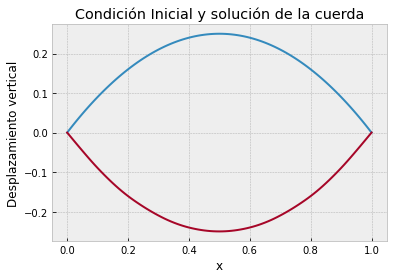

In [144]:
# Graficamos la solución
I = x*(1-x)

plt.xlabel('x')
plt.ylabel('Desplazamiento vertical')
plt.title('Condición Inicial y solución de la cuerda')
plt.plot(x,I)
plt.plot(x,u)



In [ ]:
# No la ejecuto por cuestiones de memoria...
# Gráfica interactiva

@interact
def browse_simulation_result(n=(0, len(user_data['u']) - 1)):
    "Grafica un cuadro de la simulación."
    x = user_data['x']
    t, u = user_data['u'][n]
    plt.plot(x, u)
    plt.title('t = {:.2f}'.format(t))
    plt.ylim(-0.25, 0.25)
    plt.xlabel('x')
    plt.ylabel('Desplazamiento vertical')
    plt.title('Movimiento de la cuerda vibrante')


interactive(children=(IntSlider(value=12500, description='n', max=25000), Output()), _dom_classes=('widget-int…

In [ ]:
# No la ejecuto porque crea un video... 
# Animación

from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

duration = 20

fig, ax = plt.subplots(figsize=(4, 3), facecolor='white', dpi=92)
plt.tight_layout()

def make_frame_mpl(t):
    n = int(t / duration * (len(user_data['u']) - 1))
    ax.clear()
    x = user_data['x']
    t, u = user_data['u'][n]
    ax.plot(x, u)
    ax.set_title('t = {:.2f}'.format(t))
    ax.set_ylim(-0.25, 0.25)
    ax.set_xlabel('x (a. u.)')
    ax.set_ylabel('Desplazamiento vertical (a. u.)')
    return mplfig_to_npimage(fig) # imágen de la figura

animation = mpy.VideoClip(make_frame_mpl, duration=duration)
plt.close(fig)
animation.ipython_display(fps=20, width=600)


Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2801664/45929032 bytes (6.1%)5472256/45929032 bytes (11.9%)8396800/45929032 bytes (18.3%)11624448/45929032 bytes (25.3%)14491648/45929032 bytes (31.6%)17760256/45929032 bytes (38.7%)20799488/45929032 bytes (45.3%)23838720/45929032 bytes (51.9%)26615808/45929032 bytes (57.9%)29655040/45929032 bytes (64.6%)32710656/45929032 bytes (71.2%)35479552/45929032 bytes (77.2%)

100%|█████████▉| 400/401 [00:32<00:00, 12.33it/s]


**Ejercicio 1:**

Modifique el algoritmo de diferencias finitas empleado anteriormente y resuelva la ecuación de onda amortiguada en una dimensión, dada por la ecuación

\begin{equation*}
\frac{\partial^2 u}{\partial t^2} + 
 b \frac{\partial u}{\partial t}
 = c^2 \left( 
  \frac{\partial^2 u}{\partial x^2}
   \right) \qquad x \in (0,L], t \in (0,T]
\end{equation*}

donde $b \ge 0 $ y $c$ son constantes. 

Se proporcionan las condiciones iniciales y a la frontera para encontrar la solución.

\begin{eqnarray*}
u(x,0) & = & I(x) \\
\frac{\partial}{\partial t} u(x,0) & = & 0 \\
u(0,t) & = & 0 \\
u(L,t) & = & 0 \\
\end{eqnarray*}

Utilice diferencias finitas centradas de segundo orden para aproximar la primer derivada $\partial u/\partial t$.

\begin{equation*}
\frac{\partial}{\partial t} u(x,t) \approx \frac{u(x,t+k) - u(x,t-k)}{2k}
\end{equation*}

Suponga las mismas características del ejemplo presentado anteriormente $L=10$, $c=100$m/s, $t=(0,0.25)$, y coeficiente de amortiguamiento $b=0.5$ con condiciones iniciales $u(x,0) = x(1-x)$ y $\partial u(x,0) / \partial t = 0$ y condiciones a la frontera $u(0,t)=u(L,t)=0$. 

**Ejercicio 2:**

Haga el desarrollo del algoritmo de diferencias finitas centradas para resolver la ecuación de onda en 1 dimensión si se tiene un término de forzamiento $f(x,t)$

\begin{equation*}
\frac{\partial^2 u}{\partial t^2} = c^2 \left( 
  \frac{\partial^2 u}{\partial x^2}
   \right) + f(x,t) \qquad x \in (0,L], t \in (0,T]
\end{equation*}

Con las condiciones iniciales y a la frontera para encontrar la solución.

\begin{eqnarray*}
u(x,0) & = & I(x) \\
\frac{\partial}{\partial t} u(x,0) & = & 0 \\
u(0,t) & = & 0 \\
u(L,t) & = & 0 \\
\end{eqnarray*}


One-dimensional Schrodinger equation - time evolution
Wavepacket energy:    0.012493255501361697
Potential type:       step
Potential height V0:  0.01
Barrier thickness:    15


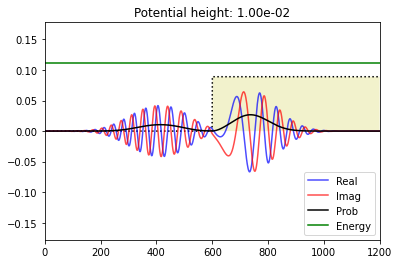

In [7]:
# Test

#=============================================================================
#
#               Quantum Mechanical Simulation using Finite-Difference
#               Time-Domain (FDTD) Method
#
#       This script simulates a probability wave in the presence of multiple
#       potentials.  The simulation is c arried out by using the FDTD algorithm
#       applied to the Schrodinger equation.  The program is intended to act as
#       a demonstration of the FDTD algorithm and can be used as an educational
#       aid for quantum mechanics and numerical methods.  The simulation
#       parameters are defined in the code constants and can be freely
#       manipulated to see different behaviors.
#
#       NOTES
#
#       The probability density plots are amplified by a factor for visual
#       purposes.  The psi_p quanity contains the actual probability density
#       without any rescaling.
#
#       BEWARE: The time step, dt, has strict requirements or else the
#       simulation becomes unstable.
#
#       The code has three built-in potential functions for demonstration.
#
#       1) Constant potential: Demonstrates a free particle with dispersion.
#
#       2) Step potential: Demonstrates transmission and reflection.
#
#       3) Potential barrier: Demonstrates tunneling.
#
#       By tweaking the height of the potential (V0 below) as well as the
#       barrier thickness (THCK below), you can see different behaviors: full
#       reflection with no noticeable transmission, transmission and
#       reflection, or mostly transmission with tunneling.
#
#               This script requires pylab and numpy to be installed with
#               Python or else it will not run.
#
#============================================================================
# Author:  James Nagel <nagel@mers.byu.edu>
#          5/25/07
#
# Updates by Fernando Perez <Fernando.Perez@colorado.edu>, 7/28/07
#============================================================================
#  Numerical and plotting libraries
import numpy as np
import pylab
# Set pylab to interactive mode so plots update when run outside ipython
pylab.ion()
#=============================================================================
# Utility functions
#  Defines a quick Gaussian pulse function to act as an envelope to the wave
#  function.
def Gaussian(x,t,sigma):
    """  A Gaussian curve.
        x = Variable
        t = time shift
        sigma = standard deviation      """
    return np.exp(-(x-t)**2/(2*sigma**2))
def free(npts):
    "Free particle."
    return np.zeros(npts)
def step(npts,v0):
    "Potential step"
    v = free(npts)
    v[npts//2:] = v0
    return v
def barrier(npts,v0,thickness):
    "Barrier potential"
    v = free(npts)
    v[npts//2:npts//2+thickness] = v0
    return v
def fillax(x,y,*args,**kw):
    """Fill the space between an array of y values and the x axis.
    All args/kwargs are passed to the pylab.fill function.
    Returns the value of the pylab.fill() call.
    """
    xx = np.concatenate((x,np.array([x[-1],x[0]],x.dtype)))
    yy = np.concatenate((y,np.zeros(2,y.dtype)))
    return pylab.fill(xx, yy, *args,**kw)

#=============================================================================
#
#  Simulation Constants.  Be sure to include decimal points on appropriate
#  variables so they become floats instead of integers.
#
N    = 1200     #  Number of spatial points.
T    = 5*N      #  Number of time steps.  5*N is a nice value for terminating
                #  before anything reaches the boundaries.
Tp   = 50       #  Number of time steps to increment before updating the plot.
dx   = 1.0e0    #  Spatial resolution
m    = 1.0e0    #  Particle mass
hbar = 1.0e0    #  Plank's constant
X    = dx*np.linspace(0,N,N)        #  Spatial axis.
# Potential parameters.  By playing with the type of potential and the height
# and thickness (for barriers), you'll see the various transmission/reflection
# regimes of quantum mechanical tunneling.
V0   = 1.0e-2   #  Potential amplitude (used for steps and barriers)
THCK = 15       # "Thickness" of the potential barrier (if appropriate
                # V-function is chosen)
# Uncomment the potential type you want to use here:
# Zero potential, packet propagates freely.
#POTENTIAL = 'free'
# Potential step.  The height (V0) of the potential chosen above will determine
# the amount of reflection/transmission you'll observe
POTENTIAL = 'step'
# Potential barrier.  Note that BOTH the potential height (V0) and thickness
# of the barrier (THCK) affect the amount of tunneling vs reflection you'll
# observe.
#POTENTIAL = 'barrier'
#  Initial wave function constants
sigma = 40.0 # Standard deviation on the Gaussian envelope (remember Heisenberg
             #  uncertainty).
x0 = round(N//2) - 5*sigma # Time shift
k0 = np.pi/20 # Wavenumber (note that energy is a function of k)
# Energy for a localized gaussian wavepacket interacting with a localized
# potential (so the interaction term can be neglected by computing the energy
# integral over a region where V=0)
E = (hbar**2/2.0/m)*(k0**2+0.5/sigma**2)
#=============================================================================
# Code begins
#
# You shouldn't need to change anything below unless you want to actually play
# with the numerical algorithm or modify the plotting.
#
#  Fill in the appropriate potential function (is there a Python equivalent to
#  the SWITCH statement?).
if POTENTIAL=='free':
    V = free(N)
elif POTENTIAL=='step':
    V = step(N,V0)
elif POTENTIAL=='barrier':
    V = barrier(N,V0,THCK)
else:
    raise ValueError("Unrecognized potential type: %s" % POTENTIAL)
#  More simulation parameters.  The maximum stable time step is a function of
#  the potential, V.
Vmax = V.max()            #  Maximum potential of the domain.
dt   = hbar/(2*hbar**2/(m*dx**2)+Vmax)         #  Critical time step.
c1   = hbar*dt/(m*dx**2)                       #  Constant coefficient 1.
c2   = 2*dt/hbar                               #  Constant coefficient 2.
c2V  = c2*V  # pre-compute outside of update loop
# Print summary info
print('One-dimensional Schrodinger equation - time evolution')
print('Wavepacket energy:   ',E)
print('Potential type:      ',POTENTIAL)
print('Potential height V0: ',V0)
print('Barrier thickness:   ',THCK)
#  Wave functions.  Three states represent past, present, and future.
psi_r = np.zeros((3,N)) #  Real
psi_i = np.zeros((3,N)) #  Imaginary
psi_p = np.zeros(N,)   # Observable probability (magnitude-squared
                          #  of the complex wave function).
#  Temporal indexing constants, used for accessing rows of the wavefunctions.
PA = 0                 #  Past
PR = 1                 #  Present
FU = 2                 #  Future
#  Initialize wave function.  A present-only state will "split" with half the
#  wave function propagating to the left and the other half to the right.
#  Including a "past" state will cause it to propagate one way.
xn = range(1,N//2)
x = X[xn]/dx    #  Normalized position coordinate
gg = Gaussian(x,x0,sigma)
cx = np.cos(k0*x)
sx = np.sin(k0*x)
psi_r[PR,xn] = cx*gg
psi_i[PR,xn] = sx*gg
psi_r[PA,xn] = cx*gg
psi_i[PA,xn] = sx*gg
# Initial normalization of wavefunctions
#   Compute the observable probability.
psi_p = psi_r[PR]**2 + psi_i[PR]**2
#  Normalize the wave functions so that the total probability in the simulation
#  is equal to 1.
P   = dx * psi_p.sum()                      #  Total probability.
nrm = np.sqrt(P)
psi_r /= nrm
psi_i /= nrm
psi_p /= P
#  Initialize the figure and axes.
pylab.figure()
xmin = X.min()
xmax = X.max()
ymax = 1.5*(psi_r[PR]).max()
pylab.axis([xmin,xmax,-ymax,ymax])
#  Initialize the plots with their own line objects.  The figures plot MUCH
#  faster if you simply update the lines as opposed to redrawing the entire
#  figure.  For reference, include the potential function as well.
lineR, = pylab.plot(X,psi_r[PR],'b',alpha=0.7,label='Real')
lineI, = pylab.plot(X,psi_i[PR],'r',alpha=0.7,label='Imag')
lineP, = pylab.plot(X,6*psi_p,'k',label='Prob')
pylab.title('Potential height: %.2e' % V0)
# For non-zero potentials, plot them and shade the classically forbidden region
# in light red, as well as drawing a green line at the wavepacket's total
# energy, in the same units the potential is being plotted.
if Vmax !=0 :
    # Scaling factor for energies, so they fit in the same plot as the
    # wavefunctions
    Efac = ymax/2.0/Vmax
    V_plot = V*Efac
    pylab.plot(X,V_plot,':k',zorder=0)   #  Potential line.
    fillax(X,V_plot, facecolor='y', alpha=0.2,zorder=0)
    # Plot the wavefunction energy, in the same scale as the potential
    pylab.axhline(E*Efac,color='g',label='Energy',zorder=1)
pylab.legend(loc='lower right')
pylab.draw()
# I think there's a problem with pylab, because it resets the xlim after
# plotting the E line.  Fix it back manually.
pylab.xlim(xmin,xmax)
#  Direct index assignment is MUCH faster than using a spatial FOR loop, so
#  these constants are used in the update equations.  Remember that Python uses
#  zero-based indexing.
IDX1 = range(1,N-1)                            #  psi [ k ]
IDX2 = range(2,N)                              #  psi [ k + 1 ]
IDX3 = range(0,N-2)                            #  psi [ k - 1 ]
for t in range(T+1):
    # Precompute a couple of indexing constants, this speeds up the computation
    psi_rPR = psi_r[PR]
    psi_iPR = psi_i[PR]
    #  Apply the update equations.
    psi_i[FU,IDX1] = psi_i[PA,IDX1] + \
                      c1*(psi_rPR[IDX2] - 2*psi_rPR[IDX1] +
                          psi_rPR[IDX3])
    psi_i[FU] -= c2V*psi_r[PR]

    psi_r[FU,IDX1] = psi_r[PA,IDX1] - \
                      c1*(psi_iPR[IDX2] - 2*psi_iPR[IDX1] +
                          psi_iPR[IDX3])
    psi_r[FU] += c2V*psi_i[PR]
    #  Increment the time steps.  PR -> PA and FU -> PR
    psi_r[PA] = psi_rPR
    psi_r[PR] = psi_r[FU]
    psi_i[PA] = psi_iPR
    psi_i[PR] = psi_i[FU]
    #  Only plot after a few iterations to make the simulation run faster.
    if t % Tp == 0:
        #  Compute observable probability for the plot.
        psi_p = psi_r[PR]**2 + psi_i[PR]**2
        #  Update the plots.
        lineR.set_ydata(psi_r[PR])
        lineI.set_ydata(psi_i[PR])
        # Note: we plot the probability density amplified by a factor so it's a
        # bit easier to see.
        lineP.set_ydata(6*psi_p)

        pylab.draw()
# So the windows don't auto-close at the end if run outside ipython
pylab.ioff()
pylab.show()
